In [19]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
import numpy as np

#Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")
import textwrap 

In [10]:
#Importando base de dados
df = pd.read_csv('C:/Users/Ricardo/cimatec/tcc/final/texto_birads_nao_balanceado.csv')

# Análise Exploratória dos Dados

In [11]:
#Dados estatisticos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        7433 non-null   int64 
 1   texto_do_laudo_3  7433 non-null   object
 2   birads            7433 non-null   object
 3   Category_Code     7433 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 232.4+ KB


In [12]:
df = df[['texto_do_laudo_3','birads']]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   texto_do_laudo_3  7433 non-null   object
 1   birads            7433 non-null   object
dtypes: object(2)
memory usage: 116.3+ KB


In [14]:
#Visualizando dados
df.head()

,texto_do_laudo_3,birads
0,ressonancia magnetica mamaria indicacao clini...,categoria 2
1,ressonancia magnetica mamaria indicacao clini...,categoria 3
2,ressonancia magnetica mamaria indicacao clini...,categoria 3
3,ressonancia magnetica mamaria indicacao clinic...,categoria 3
4,ressonancia magnetica mamaria indicacao clini...,categoria 3


## Número de laudos por birads

In [15]:
#Quantificando valores para as classes
df.birads.value_counts()

categoria 2     3387
categoria 3     1115
categoria 4      971
categoria 6      723
categoria 1      586
categoria 5      352
categoria 4a     280
categoria 0       10
categoria 4c       9
Name: birads, dtype: int64

In [16]:
#Verificando percentuais de laudos por classes
df2 = pd.DataFrame(df.groupby('birads').count()['texto_do_laudo_3']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('birads'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% de Laudos')),
    color='birads'
).transform_window(
    TotalArticles='sum(texto_do_laudo_3)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.texto_do_laudo_3 / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Percentual de laudos para cada categoria",
)

alt.LayerChart(...)

## Análise sobre o tamanho dos laudos

In [17]:
#Contando palavras
qtde_palavras = df['texto_do_laudo_3']

test = pd.DataFrame(qtde_palavras)
test.columns = ["Texto do Laudo"]

length_of_the_messages = test["Texto do Laudo"].str.split("\\s+")

print(length_of_the_messages)
print("Max number of words = ", length_of_the_messages.str.len().max())
print("Min number of words = ", length_of_the_messages.str.len().min())
print("Index = ", length_of_the_messages.str.len().idxmax())
print("Index = ", length_of_the_messages.str.len().idxmin())

0       [, ressonancia, magnetica, mamaria, indicacao,...
1       [, ressonancia, magnetica, mamaria, indicacao,...
2       [, ressonancia, magnetica, mamaria, indicacao,...
3       [ressonancia, magnetica, mamaria, indicacao, c...
4       [, ressonancia, magnetica, mamaria, indicacao,...
                              ...                        
7428    [, ressonancia, magnetica, mamaria, indicacao,...
7429    [, ressonancia, magnetica, mamaria, indicacao,...
7430    [, ressonancia, magnetica, mamaria, indicacao,...
7431    [, ressonancia, magnetica, mamaria, indicacao,...
7432    [, ressonancia, magnetica, mamaria, indicacao,...
Name: Texto do Laudo, Length: 7433, dtype: object
Max number of words =  484
Min number of words =  130
Index =  3893
Index =  6090


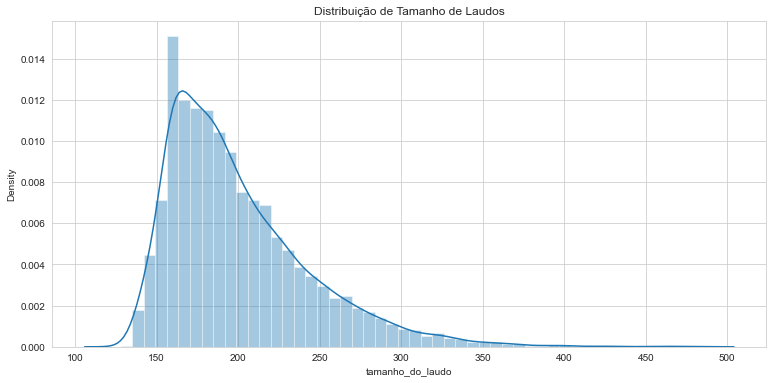

In [12]:
#Verificando tamanho de laudo por palavras existentes
df['tamanho_do_laudo'] =  [len(sentence.split()) for sentence in df['texto_do_laudo_3']]
plt.figure(figsize=(12.8,6))
sns.distplot(df['tamanho_do_laudo']).set_title('Distribuição de Tamanho de Laudos');

In [20]:
#Media de palavras por categoria
df_count_words = (df.groupby('birads')['texto_do_laudo_3']
                            .apply(lambda x: np.mean(x.str.len()))
                            .reset_index(name='mean_len_text'))
print (df_count_words)

         birads  mean_len_text
0   categoria 0    2312.700000
1   categoria 1    1310.266212
2   categoria 2    1598.997343
3   categoria 3    1827.543498
4   categoria 4    2066.027806
5  categoria 4a    1665.725000
6  categoria 4c    1941.666667
7   categoria 5    2014.340909
8   categoria 6    1857.266943


In [13]:
#Verificando dados estatisticos
df['tamanho_do_laudo'].describe()

count    7433.000000
mean      200.051258
std        43.800884
min       128.000000
25%       167.000000
50%       189.000000
75%       222.000000
max       482.000000
Name: tamanho_do_laudo, dtype: float64

**Cortando a calda para analizar melhor o histograma**

Text(0.5, 1.0, 'Distribuição de Tamanho de Laudos')

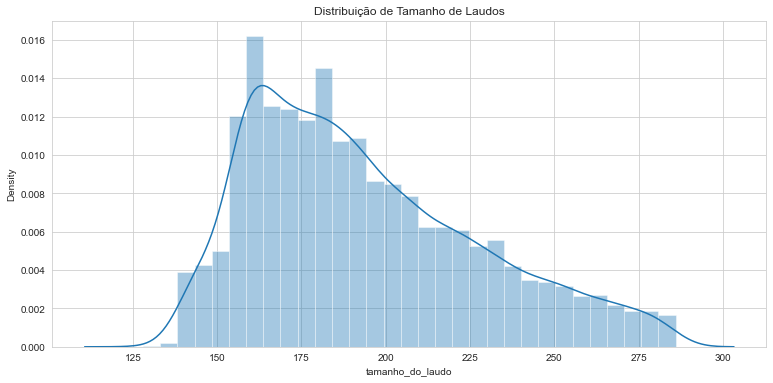

In [14]:
#Verificando distribuição
quantile_95 = df['tamanho_do_laudo'].quantile(0.95)
df_95 = df[df['tamanho_do_laudo'] < quantile_95]
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['tamanho_do_laudo'], norm_hist = True).set_title('Distribuição de Tamanho de Laudos')

In [15]:
#Número de laudos com mais de 500 palavras
df_more500 = df[df['tamanho_do_laudo'] > 400]
len(df_more500)

13

**Distribuição do tamanho dos laudos por classe**

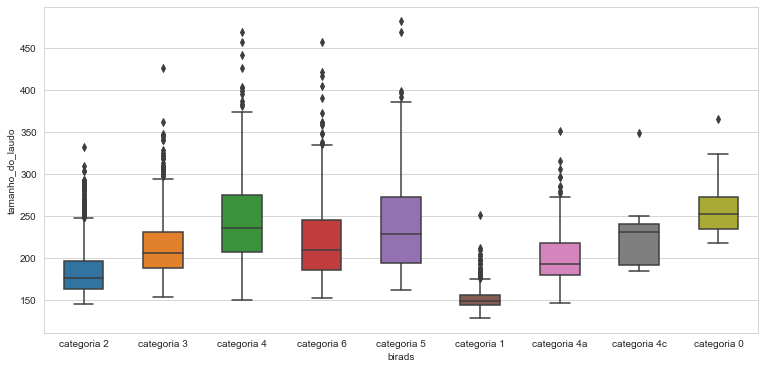

In [16]:
#df principal
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='birads', y='tamanho_do_laudo', width=.5);

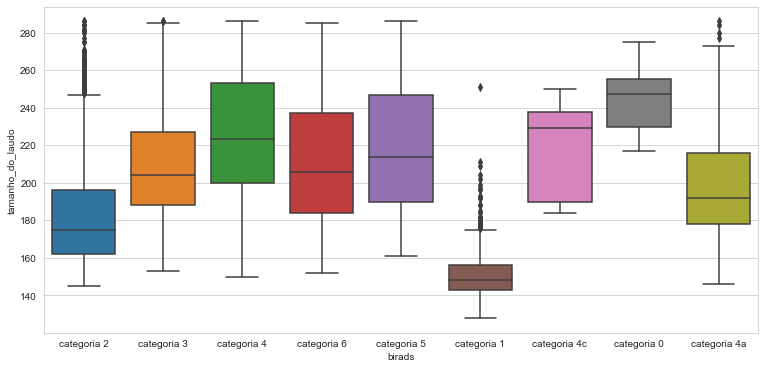

In [17]:
#df quantile 0.95
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='birads', y='tamanho_do_laudo');

## Engenharia de Atributos

In [19]:
#importando bibliotecas
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np
import string

## 2. Codificação dos rótulos

In [20]:
#Criando variavel para mapeamento de categorias
category_codes = {
    #'sem categoria': 999,
    'categoria 0': 0,
    'categoria 1': 1,
    'categoria 2': 2,
    'categoria 3': 3,
    'categoria 4': 4,
    'categoria 4a': 41,
    'categoria 4b': 42,
    'categoria 4c': 43,
    'categoria 5': 5,
    'categoria 6': 6
}

In [21]:
#Mapeamento das categorias
df['Category_Code'] = df['birads']
df = df.replace({'Category_Code':category_codes})

In [22]:
#Verificando quantidade de registros
df.Category_Code.value_counts()

2     3387
3     1115
4      971
6      723
1      586
5      352
41     280
0       10
43       9
Name: Category_Code, dtype: int64

In [23]:
#Transformando variavel em numeric
df["Category_Code"] = pd.to_numeric(df["Category_Code"])

## 3.  Divisão de conjuntos de treinamento e teste

In [24]:
#Dividindo conjuntos
X_train, X_test, y_train, y_test = train_test_split(df['texto_do_laudo_3'], 
                                                    df['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=1)

In [25]:
y_train.value_counts()

2     2854
3      958
4      826
6      608
1      502
5      306
41     245
0       10
43       9
Name: Category_Code, dtype: int64

### SMOTE

In [26]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['texto_do_laudo_3'],
                               df['Category_Code'],stratify=df['Category_Code'], random_state=0
)

In [29]:
textclassifier =Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=12)),
   ('mnb', MultinomialNB(alpha =0.1))
])

In [30]:
textclassifier.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('smote', SMOTE(random_state=12)),
                ('mnb', MultinomialNB(alpha=0.1))])

In [31]:
textclassifier.predict(['ressonancia magnetica mamaria indicacao clinica  paciente realiza  presente estudo  triagem  alto risco dados clinicos  exames anteriores paciente  historico familiar  c aspectos tecnicos estudo realizado atraves  tecnicas fast spin echo short time inversion recovery stir echo planar imaging epi  dgradient echo vibrant  imagens obtidas  planos sagital  axial ponderadas  t  t  supressao  gordura alem  sequencia axial  tecnica  difusao apos  infusao venosa  meio  contraste paramagnetico  bolo  ml  realizado estudo dinamico  cinco fases sendo  primeira concluida antes  dois minutos  sequencias sagitais ponderadas  t  supressao  gordura tecnica vibrant  posprocessamento  exame  efetuado  workstation ge  estudo cinetico  lesoes identificadas achados pele  tecido celular subcutaneo  espessura  sinal preservados complexos areolomamilares estao integros mamas apresentam parenquima fibroglandular parcialmente substituido  tecido lipomatoso  realce  fundo funcional discreto  agente  contraste paramagnetico ambas  mamas apresentam implantes  silicone uniloculares  situacao retromuscular  sinais  roturas intra  extracapsulares ambas  mamas apresentam raros  diminutos cistos simples esparsos medindo ate cm ausencia  nodulos solidos  areas  realce nao nodular  aspecto tipicamente suspeito pequenos linfonodos sao observados  cadeias axilares impressao diagnostica implantes  silicone retromusculares integros raros cistos simples esparsos exame mamario negativo  lesoes suspeitas birads rm  ab'])

array([2], dtype=int64)

<AxesSubplot:>

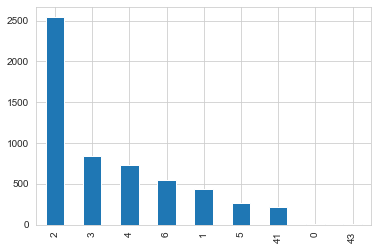

In [32]:
y_train.value_counts().plot(kind='bar')

In [33]:
y_train.value_counts()

2     2540
3      836
4      728
6      542
1      439
5      264
41     210
0        8
43       7
Name: Category_Code, dtype: int64

## 4. Transformação dos dados (representação de textos)


Alguns tipos

*   ***Count Vectors*** 
*   ***Boolean Vectors***
*   ***TF-IDF Vectors***
*   ***Word Embeddings***
*   ***Text / NLP based features***

### TF-IDF

O TF-IDF é uma pontuação que representa a importância relativa de um termo no documento e em todo o corpus. TF significa Term Frequency e IDF significa Frequência Inversa do Documento:

![alt text](https://cdn-images-1.medium.com/max/1000/0*oamFbfNAyVptRlLz.png)

O valor TF-IDF aumenta proporcionalmente ao número de vezes que uma palavra aparece no documento e é compensada pelo número de documentos no corpus que contém a palavra, o que ajuda a ajustar o fato de que algumas palavras aparecem com mais frequência em geral.

Também leva em conta o fato de que alguns documentos podem ser maiores do que outros ao normalizar o termo do TF (expressando, ao invés disso, frequências relativas de termos).

Esses dois métodos (Vetores de Contagem de Palavras e Vetores TF-IDF) são freqüentemente chamados de métodos de Bag of Words, uma vez que a ordem das palavras em uma sentença é ignorada.

**Parâmetros importantes**

* ngram_range: se queremos utilizar tokens simples ou compostos;
* max_df: número máximo de documentos que um token precisa ocorrer para ser considerado;
* min_df: número mínimo de documentos que um token precisa ocorrer para ser considerado;
* max_features: se diferente de None, cria um vocabulário de tamanho max_features com apenas com os tokens que ocorrem mais na base.
* strip_accents: remove acentos;
* stopwords: recebe a lista de stopwords para serem removidas (mais rápido que o método anteriormente apresentado).


Outros parâmetros: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [34]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = None

In [35]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(5574, 6100)
(1859, 6100)


In [36]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'categoria 0' category:
  . Most correlated unigrams:
. correlacao
. afastar
. possibilidade
. eventual
. direcionado
  . Most correlated bigrams:
. ecografico direcionado
. corresponder linfonodo

# 'categoria 1' category:
  . Most correlated unigrams:
. triagem
. obteve
. expressao
. mamario
. negativo
  . Most correlated bigrams:
. negativo birads
. diagnostica exame

# 'categoria 2' category:
  . Most correlated unigrams:
. lesao
. nodulo
. irregular
. distando
. papila
  . Most correlated bigrams:
. cm papila
. negativo lesoes

# 'categoria 3' category:
  . Most correlated unigrams:
. caracteristicas
. lento
. progressivo
. benignas
. provavelmente
  . Most correlated bigrams:
. caracteristicas provavelmente
. provavelmente benignas

# 'categoria 4' category:
  . Most correlated unigrams:
. suspeicao
. prosseguimento
. rapido
. tendencia
. plato
  . Most correlated bigrams:
. recomendase prosseguimento
. suspeicao br

# 'categoria 4a' category:
  . Most correlated unigrams:
. ma

## 5. Seleção de Atributos

In [37]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=300)
features_train = selector.fit_transform(features_train, labels_train)
features_test = selector.transform(features_test)

print(features_train.shape)
print(features_test.shape)

(5574, 300)
(1859, 300)


# Criação do Modelo

In [38]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer

score_metrics = {'F1': 'f1_macro', 'Accuracy': make_scorer(accuracy_score)}

df_estimators_scores = pd.DataFrame(columns=['Estimator', 'Cross-validation Scores', 'Test Set Scores'])
df_estimators_scores

,Estimator,Cross-validation Scores,Test Set Scores


## 1. Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

### 1.1. Ajuste de Parâmetros

In [40]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


**Randomized Search Cross Validation**

In [41]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [42]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=5,
                                   scoring=score_metrics,
                                   refit='F1',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs =2)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=8),
                   n_iter=5, n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=8, refit='F1',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'F1': 'f1_macro'},
                   verbose=1)

In [43]:
print("Os melhores hiperparâmetros encontrados com o Random Search são:")
print(random_search.best_params_)
print("")
print("A macro F1 obtida com esses hiperparâmetros é:")
print(random_search.best_score_)

Os melhores hiperparâmetros encontrados com o Random Search são:
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}

A macro F1 obtida com esses hiperparâmetros é:
0.6114417533422923


In [44]:
random_search.cv_results_

{'mean_fit_time': array([4.82609193, 5.21039844, 8.23731796, 6.56774235, 4.76026368]),
 'std_fit_time': array([0.06588886, 0.16200765, 0.23085386, 0.06626771, 0.25164228]),
 'mean_score_time': array([0.15993317, 0.24567652, 0.30784384, 0.16590476, 0.16058771]),
 'std_score_time': array([0.00249505, 0.07042936, 0.00326963, 0.00327908, 0.00162951]),
 'param_n_estimators': masked_array(data=[400, 400, 800, 400, 400],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 2, 10, 10, 2],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 4, 4, 1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'sqrt', 'sqrt'],
              mask=[False, False, False, False, 

**Grid Search Cross Validation**

In [45]:
# Create the parameter grid based on the results of random search 

#bootstrap = [True]
bootstrap = [False]

#max_depth = [None]
max_depth = [30, 40, 50]

#max_features = ['auto']
max_features = ['sqrt']

#min_samples_leaf = [1]
min_samples_leaf = [1, 2, 4]

#min_samples_split = [2]
min_samples_split = [5, 10, 15]

#n_estimators = [400]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1, n_jobs =2)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=RandomForestClassifier(random_state=8), n_jobs=2,
             param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [800]},
             scoring='accuracy', verbose=1)

In [46]:
print("Os melhores hiperparâmetros encontrados com o Random Search são:")
print(grid_search.best_params_)
print("")
print("A acurácia média obtida com esses hiperparâmetros é:")
print(grid_search.best_score_)

Os melhores hiperparâmetros encontrados com o Random Search são:
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

A acurácia média obtida com esses hiperparâmetros é:
0.8742753623188405


In [47]:
results = random_search.cv_results_

In [48]:
best_rfc = random_search.best_estimator_ 
best_rfc

RandomForestClassifier(n_estimators=400, random_state=8)

### 1.2. Treinamento e avaliação do modelo

In [49]:
best_scorer_index = np.nonzero(results['rank_test_F1'] == 1)[0][0]
best_scorer_index

0

In [50]:
best_rfc.fit(features_train, labels_train)
rfc_pred = best_rfc.predict(features_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      0.94      0.97       147
           2       0.94      0.97      0.96       847
           3       0.86      0.86      0.86       279
           4       0.74      0.81      0.77       243
           5       0.70      0.40      0.51        88
           6       0.81      0.78      0.80       181
          41       0.75      0.79      0.77        70
          43       0.00      0.00      0.00         2

    accuracy                           0.88      1859
   macro avg       0.64      0.62      0.63      1859
weighted avg       0.87      0.88      0.87      1859



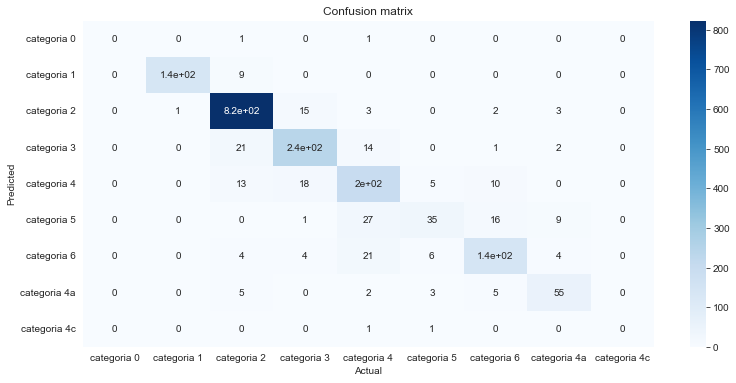

In [51]:
acc = accuracy_score(labels_test, rfc_pred)
f1 = f1_score(labels_test, rfc_pred, average='macro')
print(classification_report(labels_test,rfc_pred))

aux_df = df[['birads', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['birads'].values, 
            yticklabels=aux_df['birads'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [52]:
print("Cross-validation scores")
print("F1: %.3f - Accuracy: %.3f " % (results['mean_test_F1'][best_scorer_index], results['mean_test_Accuracy'][best_scorer_index]))
print('---------------------------')
print("Test scores")
print("F1: %.3f - Accuracy: %.3f " % (f1, acc))

Cross-validation scores
F1: 0.611 - Accuracy: 0.863 
---------------------------
Test scores
F1: 0.626 - Accuracy: 0.877 


In [53]:
d = {
     'Estimator': 'Random Forest',
     'Cross-validation Scores': (round(results['mean_test_F1'][best_scorer_index],3), round(results['mean_test_Accuracy'][best_scorer_index],3)),
     'Test Set Scores': (round(f1,3), round(acc,3))
}

df_estimators_scores = df_estimators_scores.append(d, ignore_index=True)

In [54]:
df_estimators_scores

,Estimator,Cross-validation Scores,Test Set Scores
0,Random Forest,"(0.611, 0.863)","(0.626, 0.877)"


## 2. Support Vector Machine


![](https://www.researchgate.net/profile/Elisa_Aleman_Carreon/publication/323137738/figure/fig2/AS:735529951842304@1552375414012/2D-example-of-the-Linear-SVM-classification-The-linear-kernel-for-the-SVM-classification.png)



In [55]:
from sklearn import svm

### 2.1. Ajuste de Parâmetros

In [56]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


Vamos ajustar os seguintes parâmetros:

* C: Tolerância a erros de classificação;
* kernel: Especifica o Kernel;
* gamma: coeficiente do kernel (aplicável para os kernels ‘rbf’, ‘poly’ e ‘sigmoid’);
* degree: quando o kernel for polinomial, determina o grau.

**Parâmetro Kernel**

Define uma função de transformação dos dados de modo a representá-los em um conjunto de dimensões diferente do original a fim de melhor separá-los

![alt text](https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/02/kernel.png)

**Parâmetro gamma**

Gama define o alcance da influência de um único exemplo de treinamento na definição dos limites de decisão. 

Um gama baixo levará em consideração exemplos de treinamento que estão mais longe do limite de decisão e um gama alto considerará os pontos mais próximos do limite de decisão.

Gama alto =  overfitting
Gama baixo = underfitting

gamma = 0.001

![alt text](http://wiki.eigenvector.com/images/thumb/7/73/C1g0p001.png/400px-C1g0p001.png)

gamma = 0.01

![alt text](http://wiki.eigenvector.com/images/thumb/f/f6/C1g0p01.png/400px-C1g0p01.png)

gamma = 0.1

![alt text](http://wiki.eigenvector.com/images/thumb/1/1b/C1g10.png/400px-C1g10.png)

Mais variações: http://wiki.eigenvector.com/index.php?title=Svmda

**Parâmetro degree**

Quanto maior o grau da função polinomial, maior a flexibilidade do limite de decisão.

![alt text](https://www.researchgate.net/profile/Cheng_Soon_Ong/publication/23442384/figure/fig12/AS:341444054274063@1458418014823/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png)


In [57]:
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


**Randomized Search Cross Validation**

In [58]:
# First create the base model to tune
svc = svm.SVC(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=5,
                                   scoring=score_metrics,
                                   refit='F1',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs =2)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=SVC(random_state=8), n_iter=5, n_jobs=2,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   random_state=8, refit='F1',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'F1': 'f1_macro'},
                   verbose=1)

In [59]:
print("Os melhores hiperparâmetros encontrados com o Random Search são:")
print(random_search.best_params_)
print("")
print("A macro F1 obtida com esses hiperparâmetros é:")
print(random_search.best_score_)

Os melhores hiperparâmetros encontrados com o Random Search são:
{'probability': True, 'kernel': 'poly', 'gamma': 10, 'degree': 4, 'C': 0.01}

A macro F1 obtida com esses hiperparâmetros é:
0.3823451996997571


In [60]:
results = random_search.cv_results_

best_svm = random_search.best_estimator_ 
best_svm

SVC(C=0.01, degree=4, gamma=10, kernel='poly', probability=True, random_state=8)

In [61]:
results

{'mean_fit_time': array([12.68256259, 12.59532038, 14.58890621, 10.80181464, 10.59309133]),
 'std_fit_time': array([0.437364  , 0.17862574, 0.1673301 , 0.36901023, 1.40880734]),
 'mean_score_time': array([0.98509971, 1.06051032, 1.83347034, 0.88496121, 0.91793251]),
 'std_score_time': array([0.04488299, 0.11297072, 0.01751002, 0.10021655, 0.19980783]),
 'param_probability': masked_array(data=[True, True, True, True, True],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['poly', 'linear', 'rbf', 'poly', 'poly'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.001, 0.0001, 0.0001, 10, 10],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_degree': masked_array(data=[4, 3, 4, 4, 1],
              mask=[False, False, False, False, Fals

### 2.2. Treinamento e avaliação do modelo

In [62]:
best_scorer_index = np.nonzero(results['rank_test_F1'] == 1)[0][0]
best_scorer_index

3

In [63]:
best_svm.fit(features_train, labels_train)
svm_pred = best_svm.predict(features_test)

In [64]:
acc = accuracy_score(labels_test, svm_pred)
f1 = f1_score(labels_test, svm_pred, average='macro')
print(classification_report(labels_test,svm_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.69      0.81       147
           2       0.62      1.00      0.76       847
           3       0.94      0.43      0.59       279
           4       0.57      0.33      0.42       243
           5       0.62      0.23      0.33        88
           6       0.81      0.30      0.44       181
          41       0.80      0.34      0.48        70
          43       0.00      0.00      0.00         2

    accuracy                           0.67      1859
   macro avg       0.60      0.37      0.43      1859
weighted avg       0.72      0.67      0.63      1859



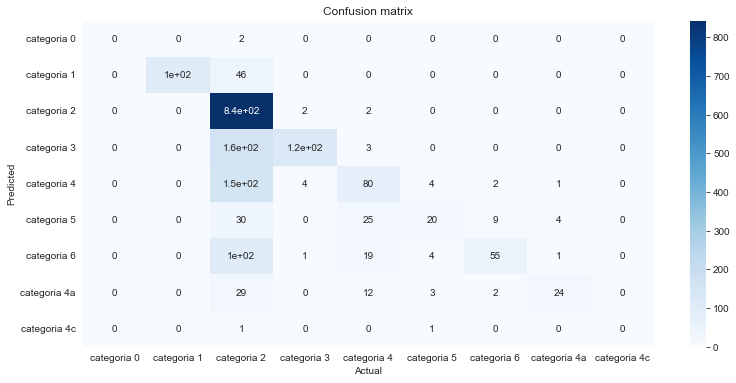

In [65]:
aux_df = df[['birads', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, svm_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['birads'].values, 
            yticklabels=aux_df['birads'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [66]:
print("Cross-validation scores")
print("F1: %.3f - Accuracy: %.3f " % (results['mean_test_F1'][best_scorer_index], results['mean_test_Accuracy'][best_scorer_index]))
print('---------------------------')
print("Test scores")
print("F1: %.3f - Accuracy: %.3f " % (f1, acc))

Cross-validation scores
F1: 0.382 - Accuracy: 0.641 
---------------------------
Test scores
F1: 0.427 - Accuracy: 0.669 


In [67]:
['Estimator', 'Cross-validation Scores', 'Test Set Scores']

d = {
     'Estimator': 'SVM',
     'Cross-validation Scores': (round(results['mean_test_F1'][best_scorer_index],3), round(results['mean_test_Accuracy'][best_scorer_index],3)),
     'Test Set Scores': (round(f1,3), round(acc,3))
}

df_estimators_scores = df_estimators_scores.append(d, ignore_index=True)

df_estimators_scores

,Estimator,Cross-validation Scores,Test Set Scores
0,Random Forest,"(0.611, 0.863)","(0.626, 0.877)"
1,SVM,"(0.382, 0.641)","(0.427, 0.669)"


In [68]:
df_estimators_scores

,Estimator,Cross-validation Scores,Test Set Scores
0,Random Forest,"(0.611, 0.863)","(0.626, 0.877)"
1,SVM,"(0.382, 0.641)","(0.427, 0.669)"


## 3. Multinomial Naïve Bayes

Digamos que estamos trabalhando no diagnóstico de uma nova doença, e que fizemos testes em 100 pessoas distintas.

Após coletarmos a análise, descobriu-se que:

* 100 pessoas realizaram o teste.
* 20% das pessoas que realizaram o teste possuíam a doença.
* 90% das pessoas que possuíam a doença, receberam positivo no teste.
* 30% das pessoas que não possuíam a doença, receberam positivo no teste.

Se uma nova pessoa realizar o teste e receber um resultado positivo, qual a probabilidade de ela possuir a doença?

![alt text](https://annalloyd.files.wordpress.com/2019/03/bayes-1.png?w=635&h=391)

**Solução:**

* P(doença|positivo) = 0,2 * 0,9
* P(doença|positivo) = 0,18

* P(não doença|positivo) = 0,8 * 0,3
* P(não doença|positivo) = 0,24

Após isso precisamos normalizar os dados, para que a soma das duas probabilidades resulte 1 (100%).

Para isso, dividimos o resultado pela soma das duas probabilidades.


P(doença|positivo) = 0,18/(0,18+0,24) = 0,4285

P(não doença|positivo) = 0,24/(0,18+0,24) = 0,5714


Assim sendo, se uma pessoa realizar o teste e receber um resultado positivo, a probabilidade de ela possuir a doença é de 57,14%


**Tipos de Naive bayes no sklearn**

* Bernoulli:  para atributos binários;
* Multinomial: atributos categóricos ou de contagem (funciona bem para contagens fracionárias como o TF-IDF);
* Gaussian: ideal para quando todos os atributos são contínuos, porém assume que a distribuição desses atributos é normal.

Fonte: https://www.organicadigital.com/seeds/algoritmo-de-classificacao-naive-bayes/


### E para texto??

P(I have huge respect for women) = P(I) × P(have) × P(huge) × P(respect) × P(for) × P(women)

P(I have huge respect for women|Trump) = P(I|Trump) × P(have|Trump) × P(huge|Trump) × P(respect|Trump) × P(for|Trump) × P(women|Trump)

P(I have huge respect for women|NotTrump) = P(I|NotTrump) × P(have|NotTrump) × P(huge|NotTrump) × P(respect|NotTrump) × P(for|NotTrump) × P(women|NotTrump)

**E se P(I) = 0?**

Parâmetro alpha 

In [69]:
from sklearn.naive_bayes import MultinomialNB 

### 3.1. Ajuste de Parâmetros

In [70]:
mnbc = MultinomialNB()
mnbc

MultinomialNB()

Aqui vamos utilizar o valor padrão de Alpha (indicando que deseja-se utilizar a suavização de Laplace)

### 3.2. Treinamento e avaliação do modelo

In [71]:
from sklearn.model_selection import cross_validate

In [72]:
scores = cross_validate(mnbc, features_train, labels_train, scoring=score_metrics, cv=3, return_train_score=True)

In [73]:
print(scores.keys())
print(scores['test_F1'])  

dict_keys(['fit_time', 'score_time', 'test_F1', 'train_F1', 'test_Accuracy', 'train_Accuracy'])
[0.37372299 0.35880786 0.36080749]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.93      0.29      0.45       147
           2       0.78      0.98      0.87       847
           3       0.85      0.65      0.73       279
           4       0.54      0.77      0.64       243
           5       0.86      0.07      0.13        88
           6       0.66      0.58      0.62       181
          41       0.78      0.30      0.43        70
          43       0.00      0.00      0.00         2

    accuracy                           0.74      1859
   macro avg       0.60      0.40      0.43      1859
weighted avg       0.76      0.74      0.71      1859



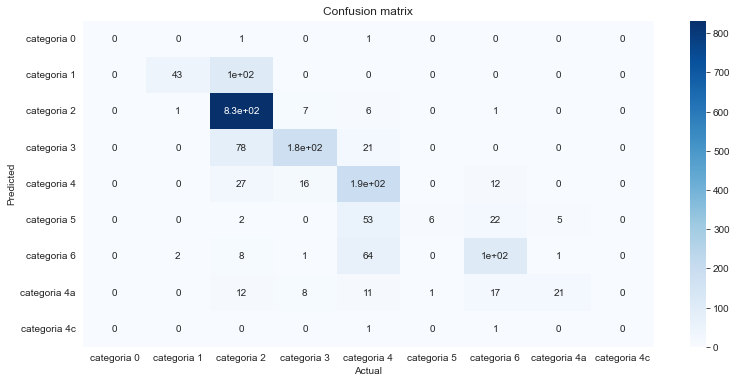

In [74]:
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)

acc = accuracy_score(labels_test, mnbc_pred)
f1 = f1_score(labels_test, mnbc_pred, average='macro')
print(classification_report(labels_test,mnbc_pred))

aux_df = df[['birads', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['birads'].values, 
            yticklabels=aux_df['birads'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [75]:
print("Cross-validation scores")
print("F1: %.3f - Accuracy: %.3f " % (round(np.mean(scores['test_F1']),3), round(np.mean(scores['test_Accuracy']),3)))
print('---------------------------')
print("Test scores")
print("F1: %.3f - Accuracy: %.3f " % (f1, acc))

Cross-validation scores
F1: 0.364 - Accuracy: 0.709 
---------------------------
Test scores
F1: 0.430 - Accuracy: 0.740 


In [76]:
d = {
     'Estimator': 'MultinomialNB',
     'Cross-validation Scores': (round(np.mean(scores['test_F1']),3), round(np.mean(scores['test_Accuracy']),3)),
     'Test Set Scores': (round(f1,3), round(acc,3))
}

df_estimators_scores = df_estimators_scores.append(d, ignore_index=True)

In [77]:
df_estimators_scores

,Estimator,Cross-validation Scores,Test Set Scores
0,Random Forest,"(0.611, 0.863)","(0.626, 0.877)"
1,SVM,"(0.382, 0.641)","(0.427, 0.669)"
2,MultinomialNB,"(0.364, 0.709)","(0.43, 0.74)"


# Análise do modelo


Vamos escolher o modelo gerado com o algoritmo Naive Bayes por ter alcançado os melhores indicadores.

Apesar de a acurácia e a medida f1 terem alcançado valores próximos de 1, ainda existem erros de classificação. Vamos agora analisar esses erros para entender esse comportamento.

In [78]:
predictions = best_rfc.predict(features_test)
#predictions = mnbc.predict(features_test)

Vamos criar o dataframe do conjunto de testes com as categorias reais e previstas:

In [79]:
# Category mapping dictionary
category_codes = {
   #'sem categoria': 999,
    'categoria 0': 0,
    'categoria 1': 1,
    'categoria 2': 2,
    'categoria 3': 3,
    'categoria 4': 4,
    'categoria 4A': 41,
    'categoria 4B': 42,
    'categoria 4C': 43,
    'categoria 5': 5,
    'categoria 6': 6
}

category_names = {
    #999: 'sem categoria',
    0: 'categoria 0',
    1: 'categoria 1',
    2: 'categoria 2',
    3: 'categoria 3',
    4: 'categoria 4',
    41: 'categoria 4A',
    42: 'categoria 4B',
    43: 'categoria 4C',
    5: 'categoria 5',
    6: 'categoria 6'
}

# Indexes of the test set
index_X_test = X_test.index

# We get them from the original df
df_test = df.loc[index_X_test]

# Add the predictions
df_test['Prediction'] = predictions

# Clean columns
df_test = df_test[['texto_do_laudo_3', 'birads', 'Category_Code', 'Prediction']]

# Decode
df_test['Category_Predicted'] = df_test['Prediction']
df_test = df_test.replace({'Category_Predicted':category_names})

# Clean columns again
df_test = df_test[['texto_do_laudo_3', 'birads', 'Category_Predicted']]

In [80]:
df_test.head()

,texto_do_laudo_3,birads,Category_Predicted
5930,ressonancia magnetica mamaria indicacao clini...,categoria 2,categoria 2
4001,ressonancia magnetica mamaria indicacao clini...,categoria 3,categoria 3
2241,ressonancia magnetica mamaria indicacao clinic...,categoria 3,categoria 4
6746,ressonancia magnetica mamaria indicacao clini...,categoria 4a,categoria 4A
5739,ressonancia magnetica mamaria indicacao clini...,categoria 2,categoria 2


Vamos pegar os artigos classificados corretamente:

In [81]:
condition = (df_test['birads'] == df_test['Category_Predicted'])

df_classified = df_test[condition]

df_classified.head(5)

,texto_do_laudo_3,birads,Category_Predicted
5930,ressonancia magnetica mamaria indicacao clini...,categoria 2,categoria 2
4001,ressonancia magnetica mamaria indicacao clini...,categoria 3,categoria 3
5739,ressonancia magnetica mamaria indicacao clini...,categoria 2,categoria 2
7149,ressonancia magnetica mamaria indicacao clini...,categoria 6,categoria 6
1434,ressonancia magnetica mamaria indicacao clinic...,categoria 2,categoria 2


Vamos pegar os artigos classificados incorretamente:

In [101]:
#condition = (df_test['birads'] != df_test['Category_Predicted'])

#df_misclassified = df_test[condition]

#df_misclassified.head(5)

Vamos pegar uma amostra de 3 artigos. Vamos definir uma função para tornar esse processo mais rápido:

In [82]:
def output_article(row_article):
    print('Actual Category: %s' %(row_article['birads']))
    print('Predicted Category: %s' %(row_article['Category_Predicted']))
    print('-------------------------------------------')
    print('Text: ')
    print('%s' %(row_article['texto_do_laudo_3']))

Selecionar três índices corretos aleatoriamente:

In [83]:
import random

random.seed(1)
list_samples = random.sample(list(df_classified.index), 20)
list_samples

[5123,
 645,
 3450,
 2698,
 960,
 3173,
 3799,
 6441,
 6874,
 6942,
 7037,
 1386,
 7151,
 384,
 3024,
 1005,
 6641,
 5315,
 3190,
 1468]

Selecionar três índices incorretos aleatoriamente:

In [104]:
#import random

#random.seed(1)
#list_samples = random.sample(list(df_misclassified.index), 20)
#list_samples

**Texto 1**

In [105]:
#output_article(df_misclassified.loc[list_samples[0]])

**Texto 2**

In [84]:
output_article(df_classified.loc[list_samples[11]])

Actual Category: categoria 6
Predicted Category: categoria 6
-------------------------------------------
Text: 
 ressonancia magnetica mamaria indicacao clinica estudo  programacao  conduta terapeutica dados clinicos  exames anteriores mamografia    outro servico demonstrou achados suspeitos  mama esquerda sendo   ultrassonografia   tambem  outro servico ja havia demonstrado nodulos  mesma mama    aspecto suspeito estudo anatomopatologico  lesao identificada  mama esquerda revelou carcinoma invasivo assim  componente intraductal aspectos tecnicos estudo realizado atraves  tecnicas fast spin echo short time inversion recovery stir echo planar imaging epi  dgradient echo vibrant  imagens obtidas  planos sagital  axial ponderadas  t  t  supressao  gordura alem  sequencia axial  tecnica  difusao apos  infusao venosa  meio  contraste paramagnetico  bolo  ml  realizado estudo dinamico  cinco fases sendo  primeira concluida antes  dois minutos  sequencias sagitais ponderadas  t  supressao  go

**Texto 3**

In [ ]:
#output_article(df_misclassified.loc[list_samples[11]])